<a href="https://colab.research.google.com/github/gregroudoudou/M1-Programmation-/blob/main/KOEBEL_Comptageeffetsmarginaux_de_r%C3%A9compensesapartirscore_avec_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poisson Regression:

We are buildling a Poisson regression model on the **student awards** dataset. The dataset contains two variables - awards won and math score.

In [ ]:
# 1) Importez la fonction de téléversement de fichiers
from google.colab import files

# 2) Téléversez le fichier CSV local
uploaded = files.upload()

# 3) Importez pandas pour manipuler les DataFrames
import pandas as pd
import io

# 4) Get the uploaded filename
uploaded_filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# 5) Chargez le CSV dans un DataFrame
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]), sep=',', header=0)

# 6) Vérifiez le contenu
df.head()


Saving competition_awards_data.csv to competition_awards_data (3).csv


,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#fetching data
df = pd.read_csv(r"/kaggle/input/award-competition/competition_awards_data.csv",  sep = ',', header= 0 )
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/award-competition/competition_awards_data.csv'

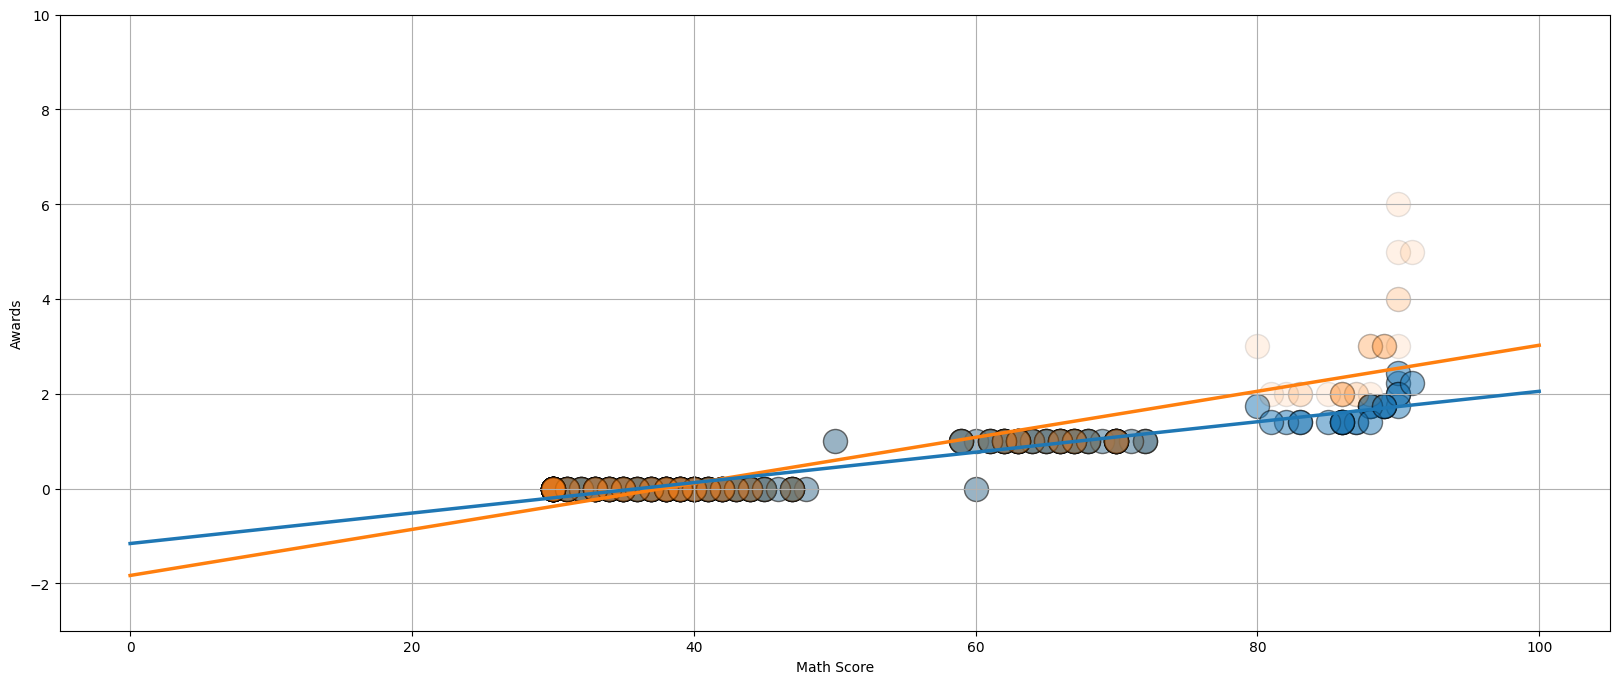

In [ ]:
# plotting transformed awards agains Math score
df['Awards_transformed']=df['Awards']**(1/2)

fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_ylim((-3,10))
ax.set_ylabel("Awards")
ax.set_xlabel("Math Score")
ax.scatter( df['Math Score'],df.Awards_transformed, alpha=0.5,s=300,edgecolors="k")
ax.scatter( df['Math Score'],df.Awards, alpha=0.1,s=300,edgecolors="k")

# Fitting data
xseq = np.linspace(0, 100, num=1000)
b, a = np.polyfit(df['Math Score'], df['Awards'], deg=1)
B, A = np.polyfit(df['Math Score'], df['Awards_transformed'], deg=1)

# Plot regression line, original
ax.plot(xseq, a + b * xseq, color='tab:orange', lw=2.5);
# Plot regression line, transformed
ax.plot(xseq, A + B * xseq, color='tab:blue',lw=2.5);
plt.show()

Valeur moyenne estimée (λ) : 0.63


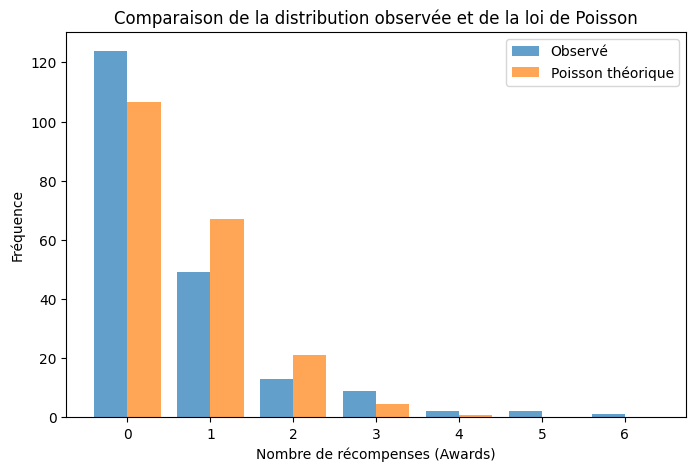

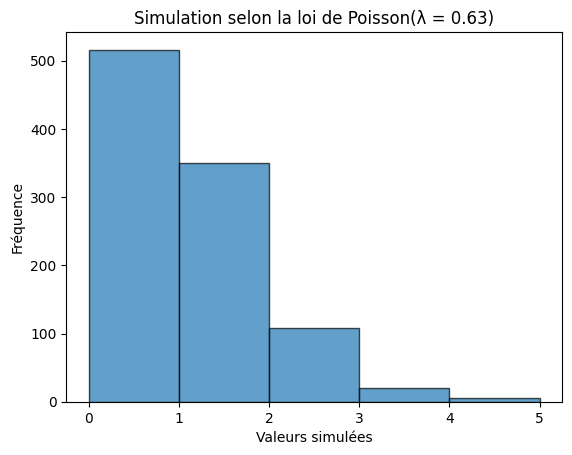

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson # Importing the poisson object from scipy.stats


# 2) Extraction de la colonne "Awards"
awards = df["Awards"].values

# 3) Estimation du paramètre lambda (λ) de la loi de Poisson
#    La moyenne empirique est l'estimateur le plus courant de λ
lambda_estime = np.mean(awards)
print(f"Valeur moyenne estimée (λ) : {lambda_estime:.2f}")

# 4) Comptage du nombre d’occurrences pour chaque valeur (observée)
valeurs_uniques, comptages_observes = np.unique(awards, return_counts=True)

# 5) Calcul des probabilités théoriques de la loi de Poisson(λ_estime)
#    pour les mêmes valeurs
prob_theoriques = poisson.pmf(valeurs_uniques, mu=lambda_estime)

# 6) Pour comparer la distribution observée et la distribution Poisson,
#    on transforme les probabilités théoriques en comptages théoriques
#    en les multipliant par le nombre total de données
comptages_theoriques = prob_theoriques * len(awards)

# 7) Affichage comparé des valeurs observées et théoriques
plt.figure(figsize=(8, 5))
plt.bar(valeurs_uniques - 0.2, comptages_observes, width=0.4, label='Observé', alpha=0.7)
plt.bar(valeurs_uniques + 0.2, comptages_theoriques, width=0.4, label='Poisson théorique', alpha=0.7)
plt.xlabel('Nombre de récompenses (Awards)')
plt.ylabel('Fréquence')
plt.title('Comparaison de la distribution observée et de la loi de Poisson')
plt.legend()
plt.show()

# 8) Génération de valeurs aléatoires selon la loi de Poisson
#    (par exemple, pour simuler 1000 observations)
valeurs_simulees = poisson.rvs(mu=lambda_estime, size=1000, random_state=42)

# Affiche un histogramme des valeurs simulées
plt.hist(valeurs_simulees, bins=range(0, max(valeurs_simulees)+2), alpha=0.7, edgecolor='black')
plt.xlabel('Valeurs simulées')
plt.ylabel('Fréquence')
plt.title(f'Simulation selon la loi de Poisson(λ = {lambda_estime:.2f})')
plt.show()

e graphique montre la répartition d’un grand nombre de valeurs simulées selon une loi de Poisson dont le paramètre
𝜆
≈
0,63
λ≈0,63. Voici ce que l’on peut en retenir :

Majorité de zéros et de 1
Étant donné que
𝜆
<
1
λ<1, la probabilité de générer
0
0 ou
1
1 événement est nettement plus élevée que celle d’en générer davantage. Sur l’histogramme, on voit clairement que les classes
0
0 et
1
1 représentent l’essentiel des observations.

Faible occurrence des valeurs élevées
Au fur et à mesure que la valeur s’éloigne de
𝜆
λ, la fréquence baisse rapidement (barres pour 2, 3, 4, 5 quasi inexistantes par comparaison). Cela traduit bien la nature de la Poisson : avec une moyenne faible (
𝜆
≈
0.63
λ≈0.63), la probabilité d’avoir 2, 3 (ou plus) occurrences décroît très vite.

Distribution discrète
La loi de Poisson est une distribution de variables aléatoires discrètes. Les barres ne sont présentes qu’aux valeurs entières (0, 1, 2, 3, etc.).

Cohérence avec
𝜆
λ
La forme observée (un pic très prononcé à 0, puis moins de 1, et très peu de 2 ou plus) correspond exactement à ce à quoi on s’attend pour
𝜆
≈
0.6
λ≈0.6. On peut le quantifier :

𝑃
(
𝑋
=
0
)
≈
𝑒
−
0.63
≈
0.53
,
𝑃
(
𝑋
=
1
)
≈
0.63
⋅
𝑒
−
0.63
≈
0.33
…
P(X=0)≈e
−0.63
 ≈0.53,P(X=1)≈0.63⋅e
−0.63
 ≈0.33…
On voit bien que près de 53 % des fois on obtient 0, et environ 33 % des fois 1, ce qui laisse moins de 15 % pour tous les autres résultats combinés (2, 3, 4, etc.).

En résumé, l’histogramme illustre exactement la concentration des résultats autour de 0 et 1, caractéristique d’une loi de Poisson à moyenne inférieure à 1.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des données
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable dépendante (ex : nombre de récompenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) Définition d'un modèle OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable dépendante
#    - Math_Score : variable indépendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math Score", data=df)

# 3) Ajustement du modèle
results = model.fit()

# 4) Résumé des résultats
print(results.summary())

# 5) Récupération du coefficient (effet marginal dans un modèle linéaire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un modèle linéaire : Awards = β0 + β1 * Math_Score + ε
# - β1 (Math_Score) représente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unité, toutes choses égales par ailleurs.
#
# => L'« effet marginal » d'une unité de Math_Score est donc exactement β1.
################################################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des données
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable dépendante (ex : nombre de récompenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) Définition d'un modèle OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable dépendante
#    - Math_Score : variable indépendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du modèle
results = model.fit()

# 4) Résumé des résultats
print(results.summary())

# 5) Récupération du coefficient (effet marginal dans un modèle linéaire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un modèle linéaire : Awards = β0 + β1 * Math_Score + ε
# - β1 (Math_Score) représente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unité, toutes choses égales par ailleurs.
#
# => L'« effet marginal » d'une unité de Math_Score est donc exactement β1.
################################################################################
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des données
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable dépendante (ex : nombre de récompenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) Définition d'un modèle OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable dépendante
#    - Math_Score : variable indépendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du modèle
results = model.fit()

# 4) Résumé des résultats
print(results.summary())

# 5) Récupération du coefficient (effet marginal dans un modèle linéaire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un modèle linéaire : Awards = β0 + β1 * Math_Score + ε
# - β1 (Math_Score) représente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unité, toutes choses égales par ailleurs.
#
# => L'« effet marginal » d'une unité de Math_Score est donc exactement β1.
################################################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des données
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable dépendante (ex : nombre de récompenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) Définition d'un modèle OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable dépendante
#    - Math_Score : variable indépendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du modèle
results = model.fit()

# 4) Résumé des résultats
print(results.summary())

# 5) Récupération du coefficient (effet marginal dans un modèle linéaire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un modèle linéaire : Awards = β0 + β1 * Math_Score + ε
# - β1 (Math_Score) représente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unité, toutes choses égales par ailleurs.
#
# => L'« effet marginal » d'une unité de Math_Score est donc exactement β1.
################################################################################
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des données
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable dépendante (ex : nombre de récompenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) Définition d'un modèle OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable dépendante
#    - Math_Score : variable indépendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du modèle
results = model.fit()

# 4) Résumé des résultats
print(results.summary())

# 5) Récupération du coefficient (effet marginal dans un modèle linéaire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un modèle linéaire : Awards = β0 + β1 * Math_Score + ε
# - β1 (Math_Score) représente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unité, toutes choses égales par ailleurs.
#
# => L'« effet marginal » d'une unité de Math_Score est donc exactement β1.
################################################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des données
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable dépendante (ex : nombre de récompenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) Définition d'un modèle OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable dépendante
#    - Math_Score : variable indépendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du modèle
results = model.fit()

# 4) Résumé des résultats
print(results.summary())

# 5) Récupération du coefficient (effet marginal dans un modèle linéaire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un modèle linéaire : Awards = β0 + β1 * Math_Score + ε
# - β1 (Math_Score) représente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unité, toutes choses égales par ailleurs.
#
# => L'« effet marginal » d'une unité de Math_Score est donc exactement β1.
################################################################################
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des données
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable dépendante (ex : nombre de récompenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) Définition d'un modèle OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable dépendante
#    - Math_Score : variable indépendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du modèle
results = model.fit()

# 4) Résumé des résultats
print(results.summary())

# 5) Récupération du coefficient (effet marginal dans un modèle linéaire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un modèle linéaire : Awards = β0 + β1 * Math_Score + ε
# - β1 (Math_Score) représente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unité, toutes choses égales par ailleurs.
#
# => L'« effet marginal » d'une unité de Math_Score est donc exactement β1.
################################################################################

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv("competition_awards_data.csv")

# Renommer la colonne dans le DataFrame
df.rename(columns={'Math Score': 'Math_Score'}, inplace=True)

# Vous pouvez alors utiliser la formule sans espace
model = smf.ols("Awards ~ Math_Score", data=df)
results = model.fit()
print(results.summary())

beta_math = results.params['Math_Score']
print(f"Effet marginal estimé de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

import pandas as pd
import statsmodels.formula.api as smf
from patsy import dmatrices

df = pd.read_csv("competition_awards_data.csv")

# Utilisation de Q(...) pour échapper un nom de variable avec espace
model = smf.ols("Awards ~ Q('Math Score')", data=df)
results = model.fit()
print(results.summary())

# Pour extraire le coefficient :
beta_math = results.params["Q('Math Score')"]
print(f"Effet marginal estimé de 'Math Score' sur 'Awards' = {beta_math:.4f}")


                            OLS Regression Results                            
Dep. Variable:                 Awards   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     704.7
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           3.77e-67
Time:                        14:07:12   Log-Likelihood:                -141.88
No. Observations:                 200   AIC:                             287.8
Df Residuals:                     198   BIC:                             294.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8340      0.099    -18.491      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# 2) Spécification du modèle Poisson
poisson_model = smf.glm(
    formula="Awards ~ Math_Score",
    data=df,
    family=sm.families.Poisson()
)

# 3) Ajustement
poisson_results = poisson_model.fit()
print(poisson_results.summary())

# 4) Effets marginaux (méthode intégrée)
marginal_effects = poisson_results.get_margeff()
print(marginal_effects.summary())

# 5) Calcul manuel de l'effet marginal moyen
beta_math = poisson_results.params['Math_Score']
yhat = poisson_results.predict(df)
marginal_individual = beta_math * yhat
marginal_mean = np.mean(marginal_individual)

print(f"Coefficient 'Math_Score' (β1) = {beta_math:.4f}")
print(f"Effet marginal moyen = {marginal_mean:.4f}")


PatsyError: Error evaluating factor: NameError: name 'Math_Score' is not defined
    Awards ~ Math_Score
             ^^^^^^^^^^

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# 1) Lecture du CSV
df = pd.read_csv("competition_awards_data.csv")

# Vérification des noms de colonnes
print("Colonnes avant renommage :", df.columns)

# 2) Renommer la colonne "Math Score" en "Math_Score"
df.rename(columns={"Math Score": "Math_Score"}, inplace=True)

# Vérification après renommage
print("Colonnes après renommage :", df.columns)

# 3) Spécification du modèle de Poisson
#    Awards : variable dépendante
#    Math_Score : variable explicative
poisson_model = smf.glm(
    formula="Awards ~ Math_Score",
    data=df,
    family=sm.families.Poisson()
)

# 4) Ajustement (fit) du modèle
poisson_results = poisson_model.fit()
print("\n=== Résumé du modèle Poisson ===")
print(poisson_results.summary())

# 5) Calcul de l'effet marginal
#
# Par défaut, get_margeff() calcule l'Average Marginal Effect (AME).
# Dans un modèle Poisson (lien log), l'effet marginal de Math_Score
# sur E(Awards) dépend de la valeur de exp(Xβ). get_margeff() moyenne
# ces effets sur toutes les observations.

marginal_effects = poisson_results.get_margeff()
print("\n=== Effets marginaux (get_margeff) ===")
print(marginal_effects.summary())

# 6) Calcul manuel de l'effet marginal moyen (AME)
#    E(Y|X) = exp(β0 + β1*Math_Score)
#    Effet marginal = ∂E(Y)/∂X = β1 * exp(β0 + β1*Math_Score)
#    => Pour l'individu i, c'est β1 * E(Y_i).
#    => On peut en prendre la moyenne (AME).

beta_math = poisson_results.params['Math_Score']  # coefficient β1
yhat = poisson_results.predict(df)                # prédiction E(Y|X) = exp(Xβ)
marginal_individual = beta_math * yhat            # effet marginal par individu
marginal_mean = np.mean(marginal_individual)      # moyenne

print(f"\nCoefficient 'Math_Score' (β1) = {beta_math:.4f}")
print(f"Effet marginal moyen (AME) = {marginal_mean:.4f}")


Colonnes avant renommage : Index(['Awards', 'Math Score'], dtype='object')
Colonnes après renommage : Index(['Awards', 'Math_Score'], dtype='object')

=== Résumé du modèle Poisson ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.94
Date:                Tue, 11 Mar 2025   Deviance:                       39.816
Time:                        14:15:16   Pearson chi2:                     36.1
No. Iterations:                     6   Pseudo R-squ. (CS):             0.7104
Covariance Type:            nonrobust                                         
                 coef    s